# Estymatory największej wiarygodności

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [19]:
# Parametry rozkładu jednostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

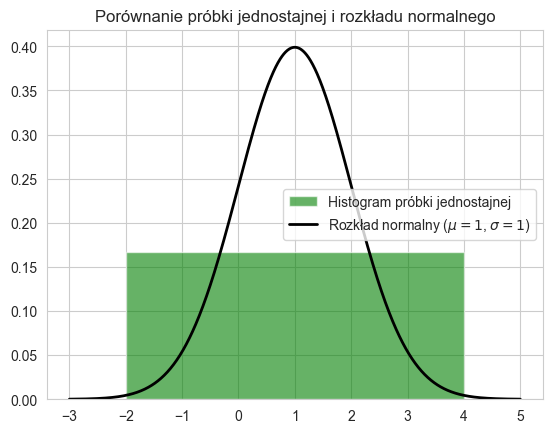

In [20]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [21]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [22]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

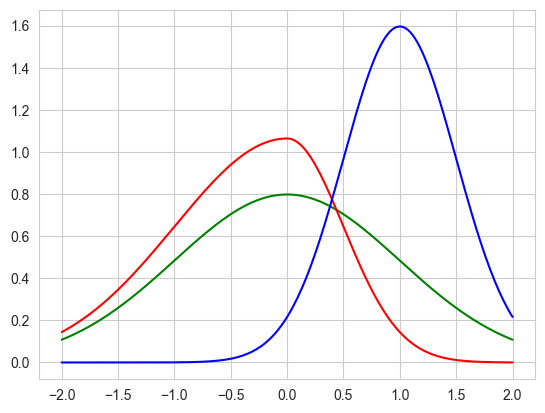

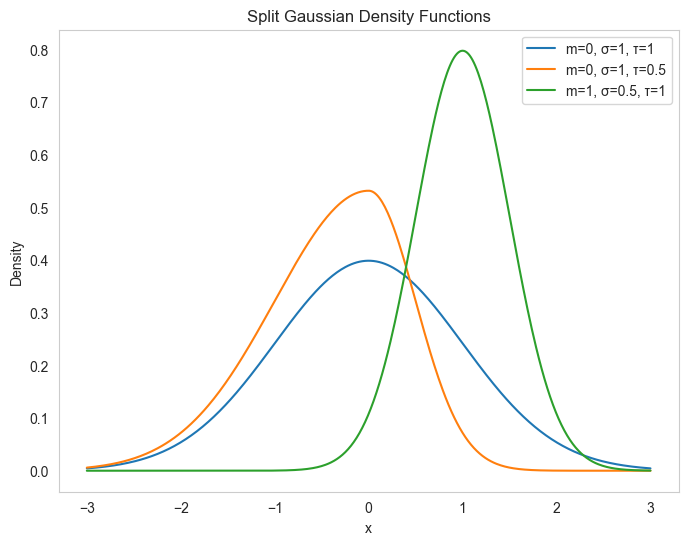

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#my solution
def split_gaussian(x, m, sigma, tau):
    c1 = 4  / (1+tau)
    c2 = c1 * tau
    pdf = np.where(
        x <= m,
        c1*norm.pdf(x, m, sigma),
        c2*norm.pdf(x, m, tau*sigma)
        )
    return pdf
def plot_densities():
    m = [0,0,1]
    sigma = [1,1,1/2]
    tau = [1,1/2,1]
    xs = np.linspace(-2, 2, 200)
    ys1 = split_gaussian(xs, m[0], sigma[0], tau[0])
    ys2 = split_gaussian(xs, m[1], sigma[1], tau[1])
    ys3 = split_gaussian(xs, m[2], sigma[2], tau[2])

    plt.plot(xs, ys1, color='g', label = f'split gaussian 1')
    plt.plot(xs, ys2, color='r', label = f'split gaussian 2')
    plt.plot(xs, ys3, color='b', label = f'split gaussian 3')
    plt.show()
plot_densities()
#chatgpt solution
def split_gaussian(x, m, sigma, tau):
    c = np.sqrt(2 / np.pi) / (sigma * (1 + tau))
    density = np.where(
        x <= m,
        c * np.exp(-0.5 * ((x - m) / sigma) ** 2),
        c * np.exp(-0.5 * ((x - m) / (tau * sigma)) ** 2)
    )
    return density

# Parametry do narysowania wykresów
params = [
    (0, 1, 1),
    (0, 1, 1/2),
    (1, 1/2, 1)
]

x_values = np.linspace(-3, 3, 400)

plt.figure(figsize=(8, 6))
for m, sigma, tau in params:
    y_values = split_gaussian(x_values, m, sigma, tau)
    plt.plot(x_values, y_values, label=f'm={m}, σ={sigma}, τ={tau}')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Split Gaussian Density Functions')
plt.legend()
plt.grid()
plt.show()



# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#my solution
def log_likelihood(x, m, sigma, tau):
    return (np.log(split_gaussian(x, m, sigma, tau))).sum()


#chat gpt solution
def log_likelihood(X,m,sigma,tau): 
    if sigma <= 0 or tau <= 0:  # Ograniczenie na wariancje
        return np.inf
    densities = split_gaussian(X, m, sigma, tau)
    return np.sum(np.log(densities))




# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [42]:

#my solution
x = 0
m = [0,0,1]
sigma = [1,1,1/2]
tau = [1,1/2,1]
func = lambda x,m,sigma,tau : -log_likelihood(x,m,sigma,tau)
res1 = optimize.fmin_cg(func, x0=x, args=(m[0], sigma[0], tau[0]))
res2 = optimize.fmin_cg(func, x0=x, args=(m[1], sigma[1], tau[1]))
res3 = optimize.fmin_cg(func, x0=x, args=(m[2], sigma[2], tau[2]))
print(res1, res2, res3)
print()
#chatgpt solution (minimalizuje po paratmetrach rozkladu co ma wiecej sensu w kontekscie nauczania maszynowego chociaz w poleceniu nie bylo to konkretnie powiedziane)
def optimize_parameters(X, initial_guess):
    result = optimize.fmin_cg(lambda params: -log_likelihood(X, *params), initial_guess)
    return result

# Przykładowe dane
np.random.seed(42)
data = np.random.normal(0, 1, 100)

# Optymalizacja parametrów
initial_guess = [1, 1, 1/2]  # Początkowe wartości dla (m, sigma, tau)
optimized_params = optimize_parameters(data, initial_guess)
print(optimized_params)

Optimization terminated successfully.
         Current function value: 0.918939
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.631256
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.225791
         Iterations: 1
         Function evaluations: 6
         Gradient evaluations: 3
[0] [0] [0.99999999]

Optimization terminated successfully.
         Current function value: 131.571491
         Iterations: 33
         Function evaluations: 264
         Gradient evaluations: 66
[0.02686325 0.98385636 0.83344918]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_optimize.py:1659: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: 44120.174230
         Iterations: 1
         Function evaluations: 432
         Gradient evaluations: 105


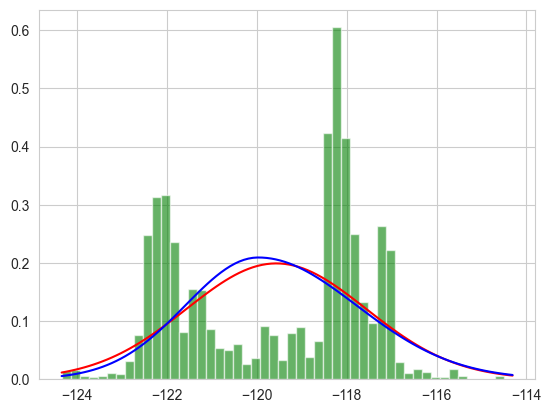

In [64]:
from sklearn import datasets
california_housing = datasets.fetch_california_housing()
data=california_housing.data[:,7]

#my solution
mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)
split_guess = [mu, sigma, tau]
split_loss = lambda params : -log_likelihood(data, params[0], params[1], params[2])
split_predictions = optimize.fmin_cg(split_loss, split_guess)
mu,sigma = stats.norm.fit(data)

xs = np.linspace(data.min(), data.max(), 100)
normal_ys = norm.pdf(xs, mu, sigma)
split_ys = split_gaussian(xs, split_predictions[0], split_predictions[1], split_predictions[2])
plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Data')
plt.plot(xs, normal_ys, color='r', label='Normal')
plt.plot(xs, split_ys, color='b', label='Split')
plt.show()


D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\Anaconda\envs\experiments\lib\site-packages\scipy\optimize\_optimize.py:1659: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: 44120.174230
         Iterations: 1
         Function evaluations: 432
         Gradient evaluations: 105


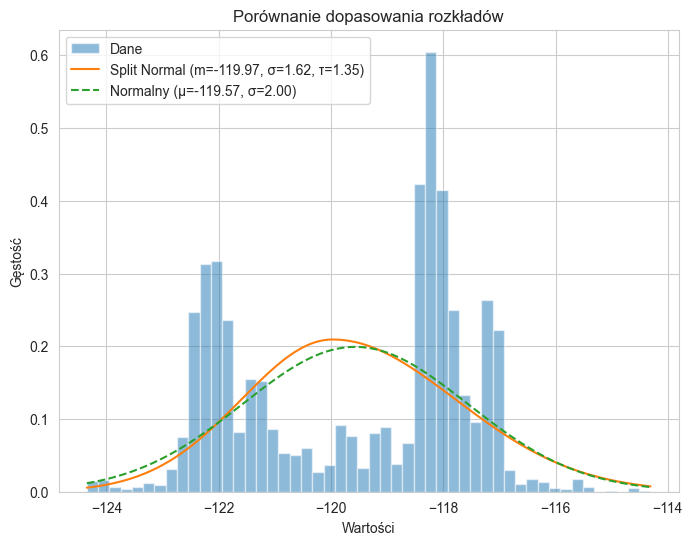

In [67]:
#chatgpt solution


# Warunki początkowe
mu_init = np.mean(data)
sigma_init = np.std(data)
tau_init = np.std(data)
initial_params = [mu_init, sigma_init, tau_init]
loss = lambda params, data: -log_likelihood(data, params[0], params[1], params[2]) 
# Minimalizacja funkcji log-wiarygodności
optimal_params = optimize.fmin_cg(loss, initial_params, args=(data,))
m_opt, sigma_opt, tau_opt = optimal_params

# Dopasowanie rozkładu normalnego
mu_norm, std_norm = norm.fit(data)

# Wizualizacja wyników
x_values = np.linspace(min(data), max(data), 500)
y_split = split_gaussian(x_values, m_opt, sigma_opt, tau_opt)
y_norm = norm.pdf(x_values, mu_norm, std_norm)

plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=True, alpha=0.5, label="Dane")
plt.plot(x_values, y_split, label=f"Split Normal (m={m_opt:.2f}, σ={sigma_opt:.2f}, τ={tau_opt:.2f})")
plt.plot(x_values, y_norm, label=f"Normalny (μ={mu_norm:.2f}, σ={std_norm:.2f})", linestyle='dashed')
plt.xlabel("Wartości")
plt.ylabel("Gęstość")
plt.title("Porównanie dopasowania rozkładów")
plt.legend()
plt.show()